In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/camembert/__results__.html
/kaggle/input/camembert/__notebook__.ipynb
/kaggle/input/camembert/__output__.json
/kaggle/input/camembert/100k_sentence_embeddings_min_1_emoji_from_top100.csv
/kaggle/input/camembert/custom.css
/kaggle/input/tweets/100k_tweets_and_encodings_min_1_emoji_from_top100.csv
/kaggle/input/tweets/tweets_fr.txt
/kaggle/input/tweets/1M_tweets_and_encodings.csv/1M_tweets_and_encodings.csv


In [2]:

tweets = pd.read_csv('../input/tweets/100k_tweets_and_encodings_min_1_emoji_from_top100.csv', nrows=1e5)
tweets.head()

,Unnamed: 0,original_tweet,clean_tweet,emoji_0,emoji_1,emoji_2,emoji_3,emoji_4,emoji_5,emoji_6,...,emoji_90,emoji_91,emoji_92,emoji_93,emoji_94,emoji_95,emoji_96,emoji_97,emoji_98,emoji_99
0,0,@chlechevalier @agnesbuzyn @googlenews macron ...,macron n a pas honte de faire la fête brizitte...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,et vous ? 🥰 bonne année les amis ! 💃 twitterli...,et vous bonne année les amis twitterlink,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,villa brûlée ✅ bientôt la venue de mujdat 🙃 #l...,villa brûlée bientôt la venue de mujdat lmvsmo...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,mary poppins - supercalifragilisticexpialidoci...,mary poppins supercalifragilisticexpialidociou...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,le seul truc qui me choque dans house of cards...,le seul truc qui me choque dans house of cards...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
embeddings = pd.read_csv('/kaggle/input/camembert/100k_sentence_embeddings_min_1_emoji_from_top100.csv',header=None, nrows=768*1e5)

In [4]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.001447,0.092994,-0.009350,0.085384,0.049073,-0.019671,0.027124,0.016720,0.000996,0.097122,...,0.056855,0.034935,0.019349,-0.057638,0.107555,-0.051276,-0.001608,-0.043403,0.060847,0.022089
1,-0.014390,0.085764,0.013243,0.121239,0.045293,-0.077065,-0.014799,0.119462,-0.056762,0.035415,...,0.014410,-0.036498,-0.058561,0.058630,0.022262,-0.053088,0.098811,-0.071821,0.015522,-0.069792
2,-0.013849,0.117641,0.020475,0.064867,-0.035801,-0.037069,0.019572,0.122810,-0.050001,0.052739,...,-0.002111,0.052517,-0.031793,0.063106,0.051268,0.010136,0.068327,-0.017445,-0.007710,0.042267
3,0.008730,0.136148,-0.063046,0.062043,-0.031096,-0.023367,-0.052585,0.047489,0.024887,0.074735,...,0.036097,0.089102,0.072906,0.062715,0.034218,-0.048447,0.005070,-0.006587,0.055954,0.077583
4,0.038581,0.104138,-0.076488,0.083353,0.005929,0.010295,0.007722,-0.018522,-0.045171,0.108517,...,0.051903,0.050374,0.051731,-0.095537,0.082601,-0.024057,0.040953,-0.023526,0.017301,0.011934


In [5]:
array = np.array(embeddings)

In [6]:
targets = tweets.drop(['clean_tweet', 'original_tweet', 'Unnamed: 0'], axis=1)
targets = np.array(targets)
#targets = np.reshape(targets, (10000, 100))
targets.shape

(100000, 100)

In [7]:
tweets_embeddings = np.reshape(array,(100000, 768))
tweets_embeddings.shape 
x_train, x_test = tweets_embeddings[5000:, :], tweets_embeddings[:5000, :]
y_train, y_test = targets[5000:, :], targets[:5000, :]

In [8]:
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape )

(95000, 768) (5000, 768)
(95000, 100) (5000, 100)


In [9]:
targets

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Epoch 1/50
10/10 - 2s - loss: 0.7800 - accuracy: 0.0104 - val_loss: 0.6927 - val_accuracy: 0.0093
Epoch 2/50
10/10 - 1s - loss: 0.7370 - accuracy: 0.0111 - val_loss: 0.6827 - val_accuracy: 0.0109
Epoch 3/50
10/10 - 1s - loss: 0.7084 - accuracy: 0.0122 - val_loss: 0.6743 - val_accuracy: 0.0146
Epoch 4/50
10/10 - 1s - loss: 0.6878 - accuracy: 0.0125 - val_loss: 0.6615 - val_accuracy: 0.0172
Epoch 5/50
10/10 - 1s - loss: 0.6654 - accuracy: 0.0129 - val_loss: 0.6408 - val_accuracy: 0.0150
Epoch 6/50
10/10 - 1s - loss: 0.6366 - accuracy: 0.0135 - val_loss: 0.6127 - val_accuracy: 0.0111
Epoch 7/50
10/10 - 1s - loss: 0.5982 - accuracy: 0.0130 - val_loss: 0.5777 - val_accuracy: 0.0092
Epoch 8/50
10/10 - 1s - loss: 0.5512 - accuracy: 0.0124 - val_loss: 0.5351 - val_accuracy: 0.0086
Epoch 9/50
10/10 - 1s - loss: 0.4966 - accuracy: 0.0128 - val_loss: 0.4868 - val_accuracy: 0.0093
Epoch 10/50
10/10 - 1s - loss: 0.4384 - accuracy: 0.0117 - val_loss: 0.4375 - val_accuracy: 0.0089
Epoch 11/50
10/10 -

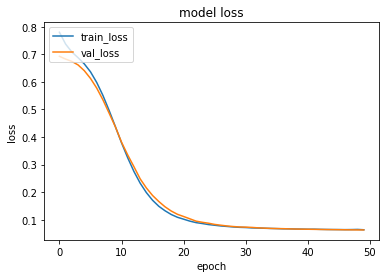

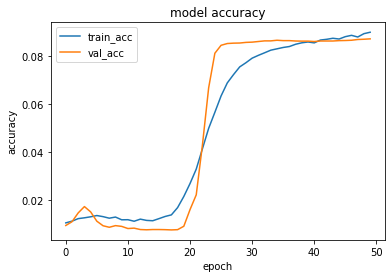

In [11]:
import matplotlib.pyplot as plt
model = keras.Sequential(
    [
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(100, activation="sigmoid"),
    ]
)

model.compile(optimizer = 'adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
history = model.fit(x_train, y_train,validation_split = 0.2,epochs = 50,batch_size = 8096, verbose=2)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

## Results Viz 

In [12]:
top_100_empojis = ['😂',
 '😭',
 '👉',
 '😍',
 '😉',
 '🔥',
 '🤣',
 '🙏',
 '👍',
 '🥰',
 '😁',
 '😊',
 '🤔',
 '💪',
 '😘',
 '😅',
 '🥺',
 '✨',
 '👏',
 '👌',
 '😔',
 '😎',
 '🎉',
 '👀',
 '😋',
 '🎶',
 '😱',
 '😏',
 '😡',
 '🔴',
 '🙄',
 '👇',
 '✅',
 '💕',
 '🤩',
 '💀',
 '😌',
 '😢',
 '🤗',
 '🤪',
 '😜',
 '🥳',
 '💙',
 '😳',
 '🤝',
 '💜',
 '👨',
 '🙈',
 '😀',
 '🙂',
 '🤷',
 '🙃',
 '💔',
 '😇',
 '😬',
 '👩',
 '🤡',
 '😴',
 '🤧',
 '😄',
 '🤦',
 '🤭',
 '💥',
 '💖',
 '😒',
 '🤮',
 '😤',
 '😩',
 '🙌',
 '🥵',
 '🎁',
 '😪',
 '😈',
 '😃',
 '🧐',
 '🎄',
 '💚',
 '🤯',
 '🚨',
 '🖤',
 '🤞',
 '😆',
 '📸',
 '🤫',
 '✊',
 '😕',
 '💛',
 '🤤',
 '🥴',
 '🤓',
 '😠',
 '🏆',
 '😖',
 '⚽',
 '🤬',
 '😥',
 '🚀',
 '😞',
 '😫',
 '😷']

In [13]:
y_preds = model.predict(x_test)

In [14]:
for n in range(100): 
    i = np.random.randint(5000)
    tweet = tweets['original_tweet'][i]
    true_emojis = np.nonzero(y_test[i])
    true_emojis_graphics = [top_100_empojis[k] for k in true_emojis[0].tolist()]
    #true_emojis_graphics
    #predicted_emoji = top_100_empojis[np.argmax(y_preds[i])]
    predicted_emojis = np.argsort(-y_preds[i])[:3]
    predicted_emojis_graphics = [top_100_empojis[e] for e in predicted_emojis]
    print(tweet)
    print("predicted:", predicted_emojis_graphics, '  true:', true_emojis_graphics )
    print('\n**************************')
    print()

il y a un faux air de kk ’ 1 prêt à tout pour ‘ ’ sauver ” république 🧐 twitterlink

predicted: ['😂', '😭', '🤣']   true: ['🧐']

**************************

@samrmbltt lolo a dit sa ! omg ya beaucoup de progrès il manque plus que manu et le tour est joué 😎

predicted: ['😂', '😭', '😉']   true: ['😎']

**************************

#csp4ever #ensemble encore joyeux anniversaire @semajchriston 🥳 un immense merci au cercle brasserie ( franck et mickaël ) d ’ avoir accueilli le groupe le 1er novembre 💚 👌 twitterlink

predicted: ['😍', '🔥', '👉']   true: ['👌', '🥳', '💚']

**************************

mal de ventre intense , poitrine qui pèse une tonne alors que 🤡 j ’ ai pas de seins 🤡 petite nausée quand je mange : les anglais vont bientôt débarqués 🚩 🚩 🚩 🚩

predicted: ['😂', '😭', '🤣']   true: ['🤡']

**************************

@ololz_ et de m6 ma belle 😉 👸

predicted: ['😂', '😍', '😭']   true: ['😉']

**************************

une nouvelle agence à dieppe 🤩 viens rencontrer l ' équipe souriante ☺ et mo

In [15]:
model.save('100k_sentences_averaged_embedding.h5')